In [1]:
import numpy as np
import os, sys
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib import colorbar as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

cmap = plt.cm.plasma(np.linspace(0,1,20)) #3rd num is the number of colours

##PLOT setttings
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,25,25,30
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=MEDIUM_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


proj_dir = '/n/home04/lvanson/KatieSharpeProj/'
data_dir = proj_dir + 'Example_system/2.2_1.00_2.10'


%matplotlib inline

In [2]:
#open a hisory or profile and put it into an astropy table
def read_file(name, basedir, pnum = 10):
    if 'profile' in name:
        name += str(pnum)
#     print(basedir, name)
    #open file and get column names
    file = open(basedir +name+'.data', "r")
    star_age = -999
    for i, line in enumerate(file):
        if 'profile' in name and i == 2:
            ster_info =	np.array(line.split())
            star_age = np.float32(ster_info[4]) #second to year
#             print('ster_info',ster_info)
        if i == 5: 
            ColName = np.array(line.split())
            break
    #put data in correct columns, and organise in table format
    data = np.loadtxt(basedir +name+'.data',  comments='#', converters=None, skiprows=6, unpack =True)
    t = Table()
    for j, nome in enumerate(ColName):
        try:
            t[nome] = data[j]
        except:
            print('You couldnt read this file:', basedir +name+'.data' )
            return None,None
    return t, star_age

#Plot the HR diagram with different colour values
def HR_diagram(logdir = './', colour_by = 'star_age',save_loc = './', colors = 'rainbow',numdir=0, Vmin = 'auto', Vmax = 'auto', x_lim = (None,None), y_lim = (None,None)):
    colors = ['rainbow', r'rainbow']#[purples, YlRed]
    logsdir = logdir+'/LOGS1/' #'/work/LOGS/'
    logsdir2 = logdir+'/LOGS2/' #'/work/LOGS/'
    dirs = [logsdir]#, Dir2]
    msizes = [7,1]
    
    fig, ax = plt.subplots(figsize=(12,10))
    for i in range(len(dirs)):
        print(dirs[i])
        if not dirs[i]:
            continue
        history, _ = read_file('history', dirs[i])
        if history == None:
            return None
        mzams = 'M$_{i}$ '+str(round(history['star_mass'][0],2) )+'M$_{\odot}$'
        Pzams = 'P$_{i}$ '+str(round(history['period_days'][0],1) )+ 'd'
        print(i, ' Mi ',str(round(history['star_mass'][0],2) ),'Msun, ',
              'Pi '+str(round(history['period_days'][0],1) )+ 'd')
        if Vmin == 'auto':
            Vmin = min(history[colour_by])
#             print('Vmin',Vmin)
        if Vmax == 'auto':
            Vmax = min(history[colour_by]) + 1 #max(history[colour_by])   
#             print('Vmax',Vmax)
        history['star_age'] = history['star_age']*1e-6 #in Myr
        history['dM']  = history['star_mass'][0] - history['star_mass']
        #############    #############    ############# 
        ax.scatter(history['log_Teff'][0], history['log_L'][0],marker = '*',s = 200, edgecolor = 'k',label = None,c = 'yellow',alpha = 1., zorder = 50) 
        ax.text(history['log_Teff'][-1], history['log_L'][-1], str(numdir), size = 20, zorder = 50) 
        ax.text(history['log_Teff'][0], history['log_L'][0], mzams+', '+Pzams)
        im = ax.scatter(history['log_Teff'], history['log_L']\
                    ,marker = 'o',s = msizes[i],label = 'star 1', c = history[colour_by], cmap = colors[0] ,alpha = 0.75,vmin=Vmin, vmax= Vmax) # 
    plt.colorbar(im, label = colour_by)
    if y_lim:
        ax.set_ylim(y_lim)
    if x_lim:
        ax.set_xlim(x_lim)

    ax.set_ylabel('log$_{10}$(L/L$_{\odot}$)',fontsize = 22)
    ax.set_xlabel('log$_{10}$(T$_{eff}$/K)',fontsize = 22)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.legend(loc = 'lower left', fontsize = 'large')
    ax.invert_xaxis()
    plt.tight_layout()
    plt.show()
    
    return history
    

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/16//LOGS1/
0  Mi  188.36 Msun,  Pi 0.8d


/n/home04/lvanson/.conda/envs/jupyter_3.6/lib/python3.6/site-packages/astropy/table/table.py:3075: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


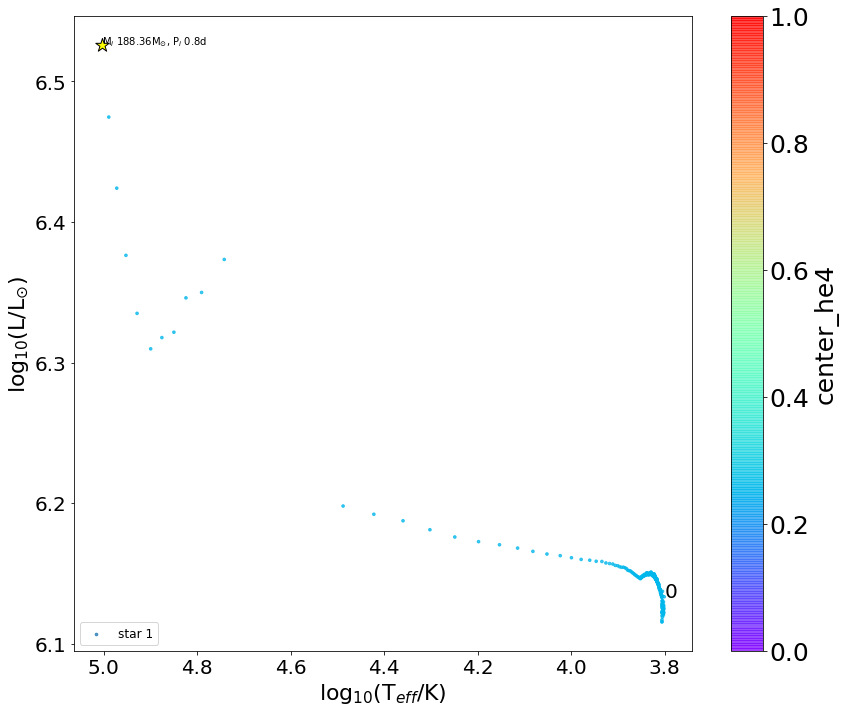

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/39//LOGS1/
0  Mi  188.36 Msun,  Pi 1.0d


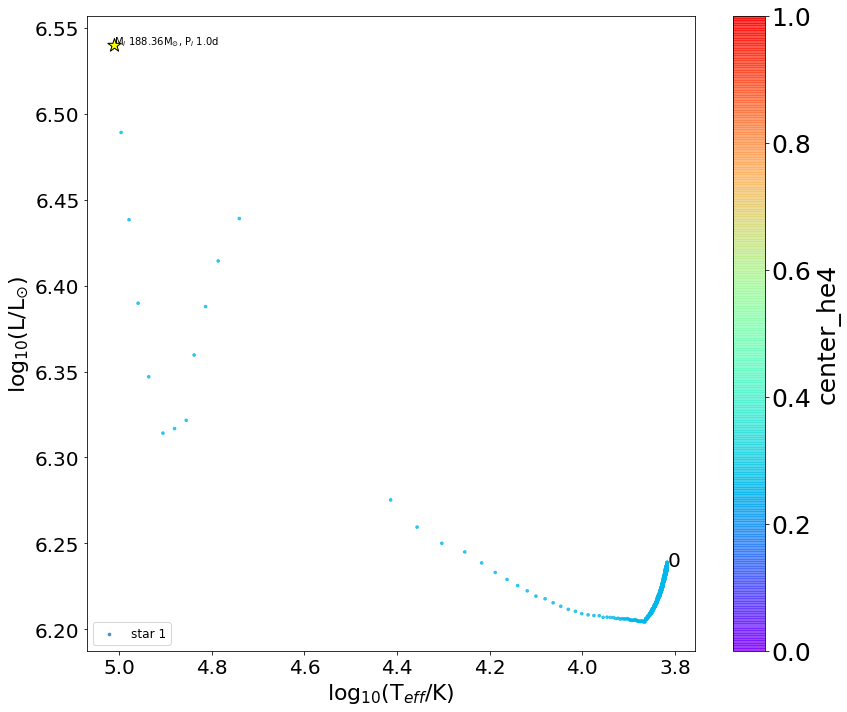

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/62//LOGS1/
0  Mi  188.36 Msun,  Pi 1.2d


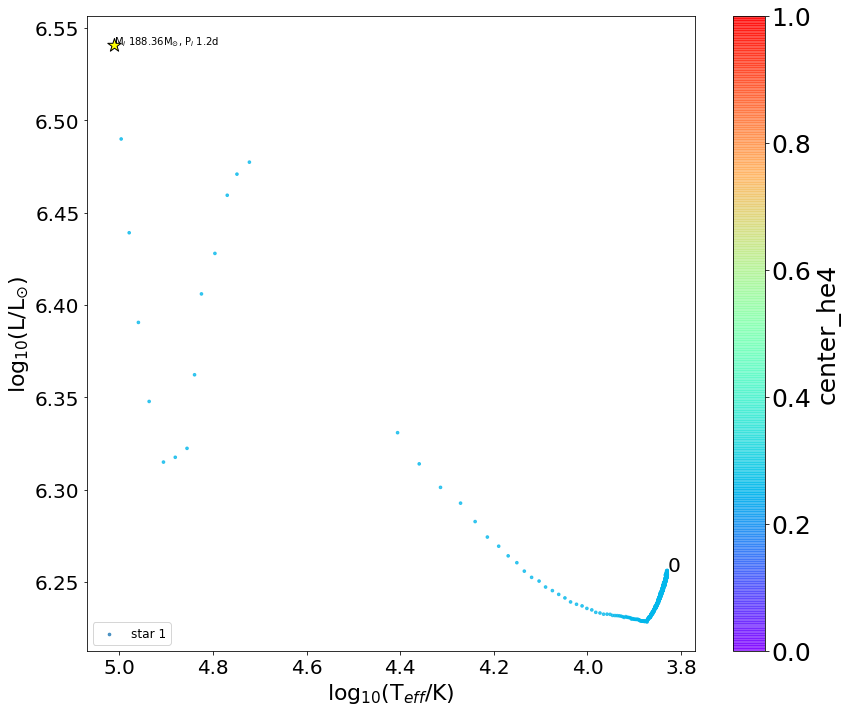

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/85//LOGS1/
0  Mi  188.36 Msun,  Pi 1.4d


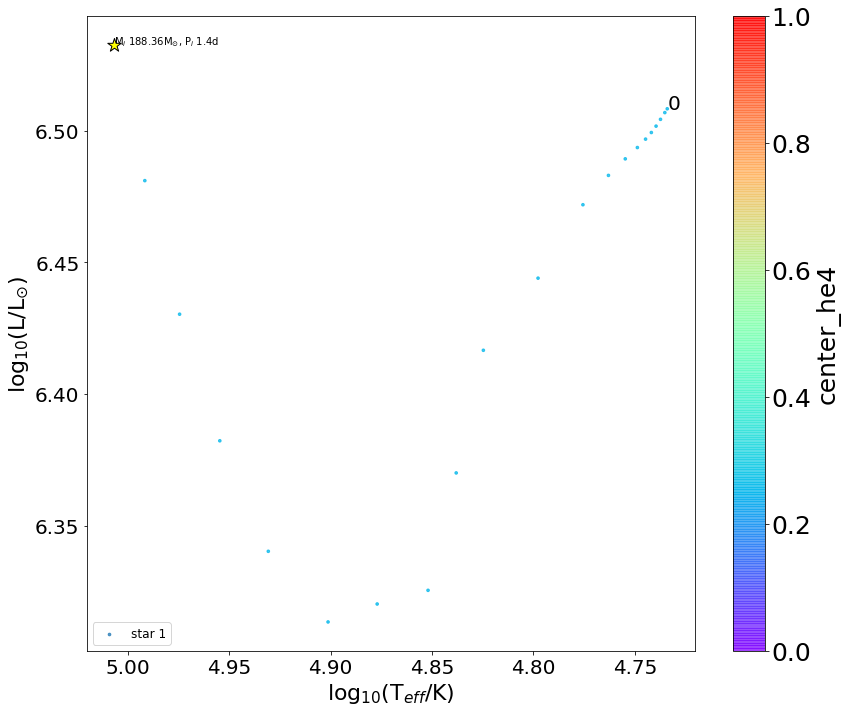

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/108//LOGS1/
0  Mi  188.36 Msun,  Pi 1.6d


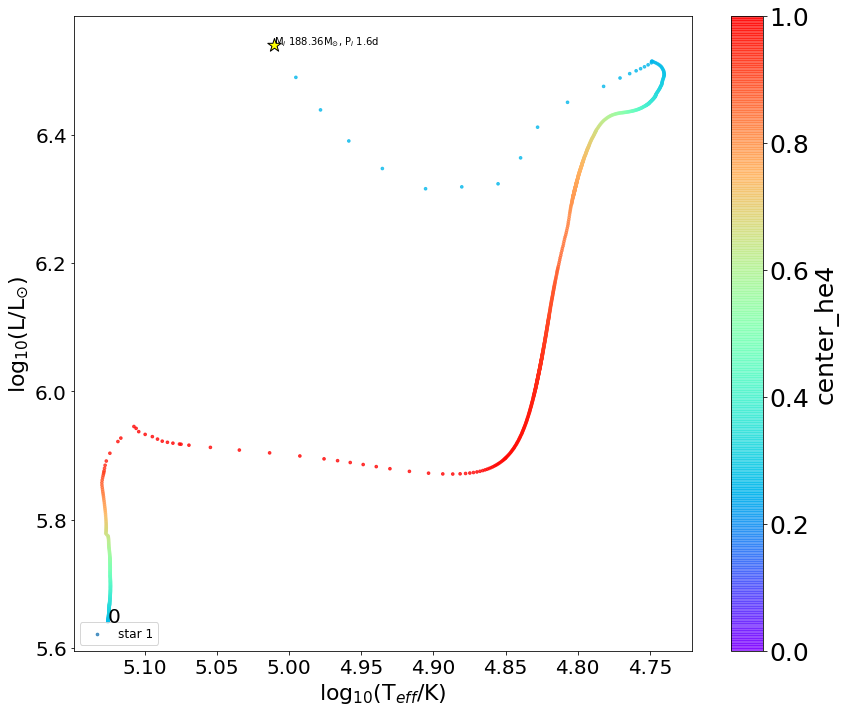

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/131//LOGS1/
0  Mi  188.36 Msun,  Pi 1.8d


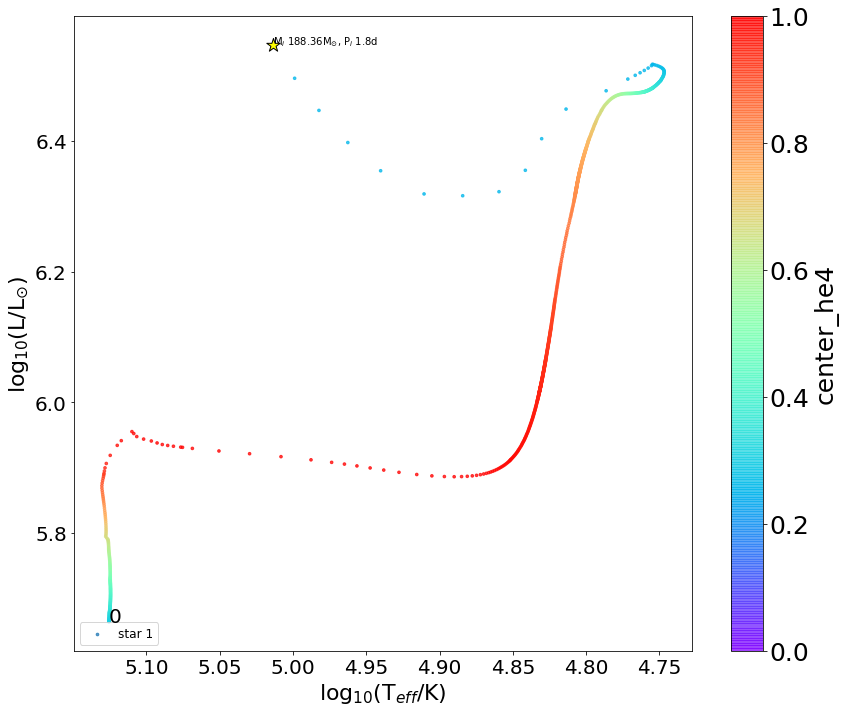

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/154//LOGS1/
0  Mi  188.36 Msun,  Pi 2.0d


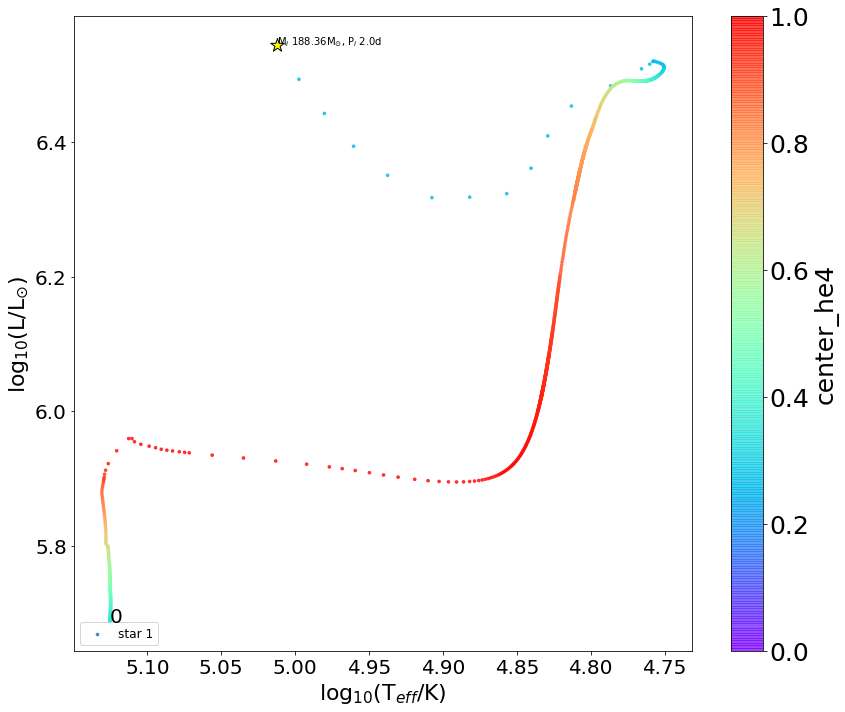

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/177//LOGS1/
0  Mi  188.36 Msun,  Pi 2.2d


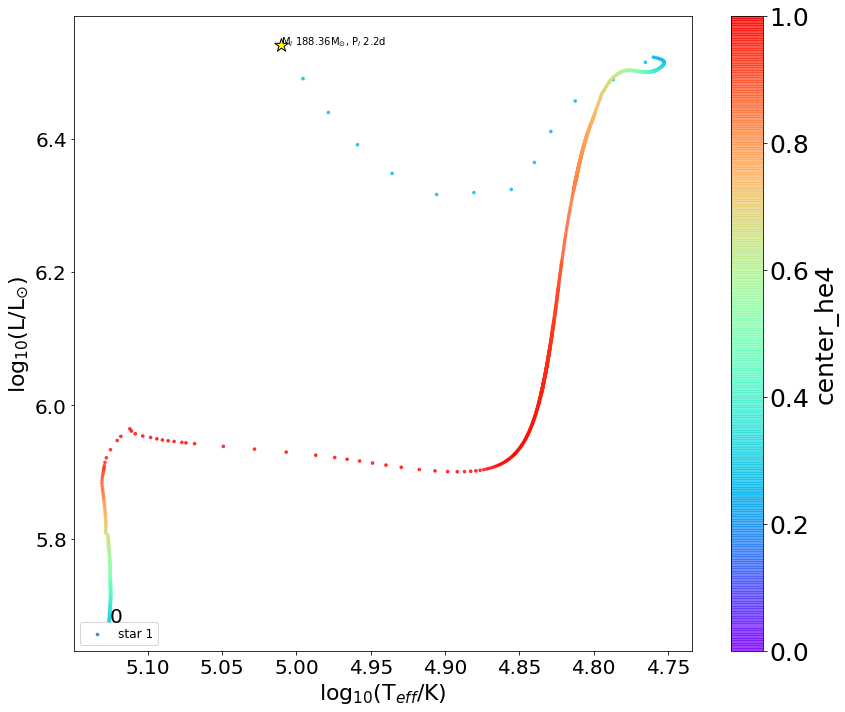

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/200//LOGS1/
0  Mi  188.36 Msun,  Pi 2.4d


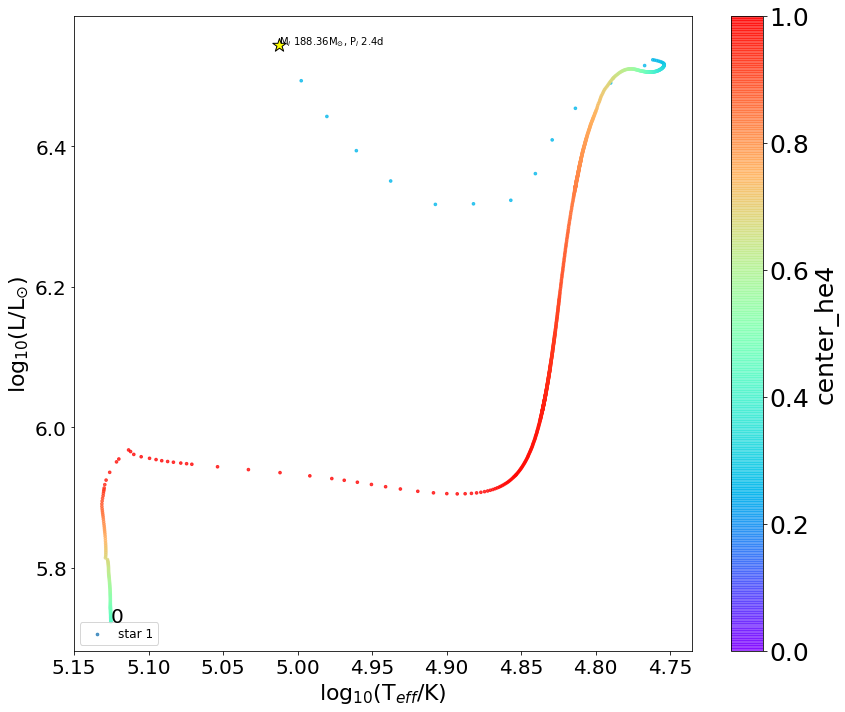

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/223//LOGS1/
0  Mi  188.36 Msun,  Pi 2.6d


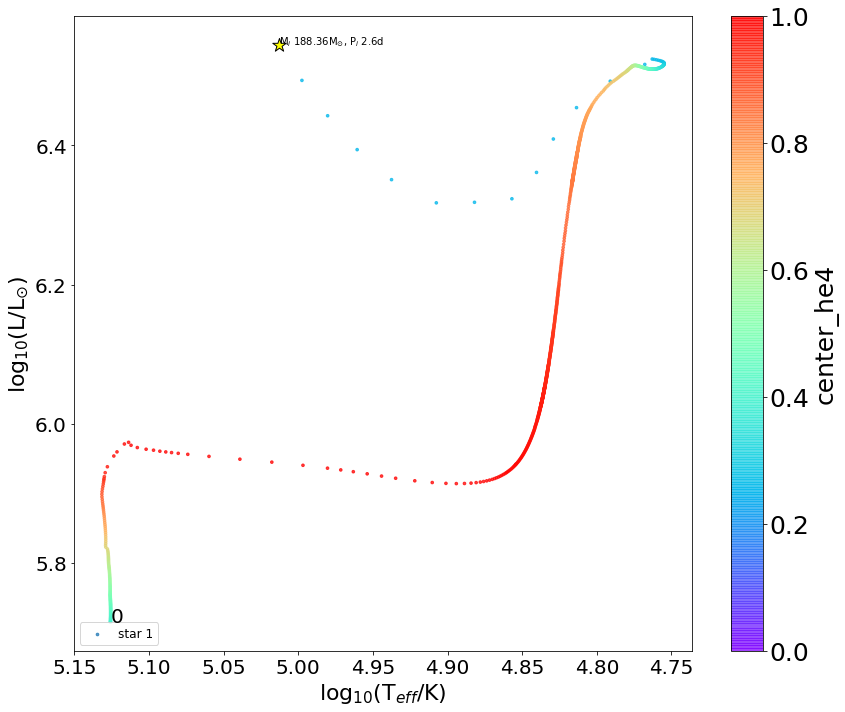

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/246//LOGS1/
0  Mi  188.36 Msun,  Pi 2.8d


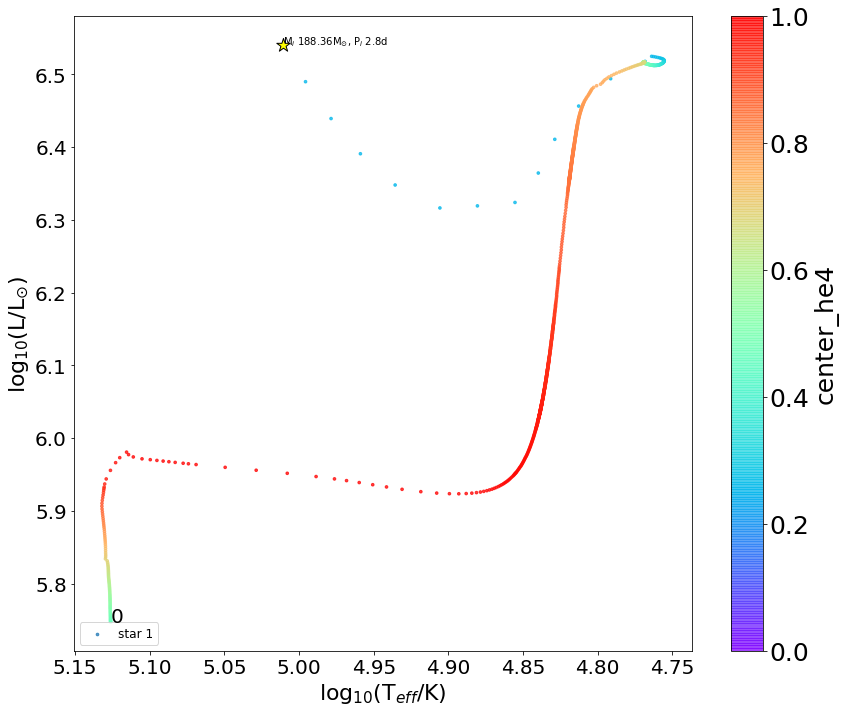

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/269//LOGS1/
0  Mi  188.36 Msun,  Pi 3.0d


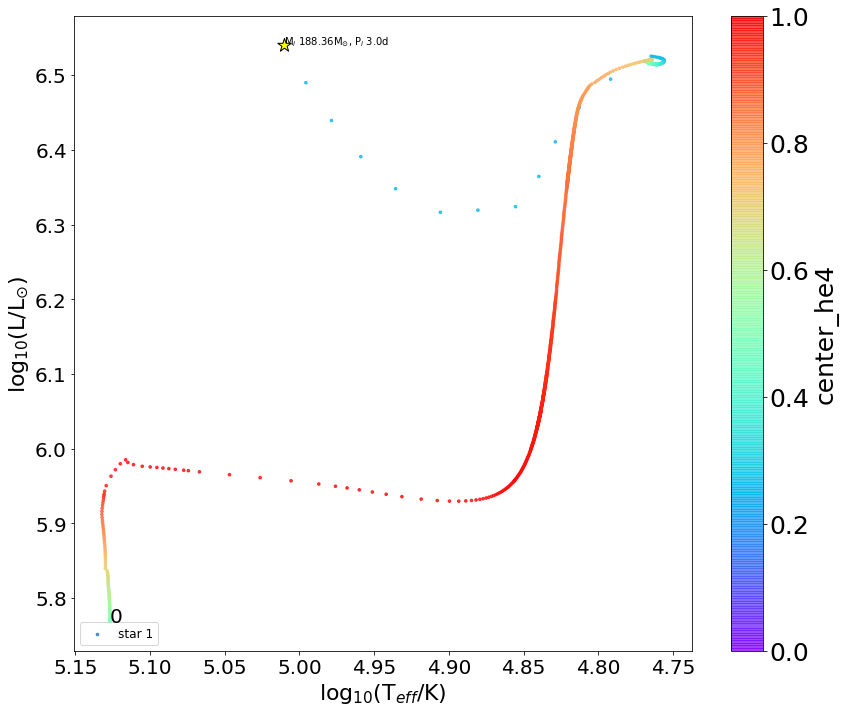

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/292//LOGS1/
0  Mi  188.36 Msun,  Pi 3.2d


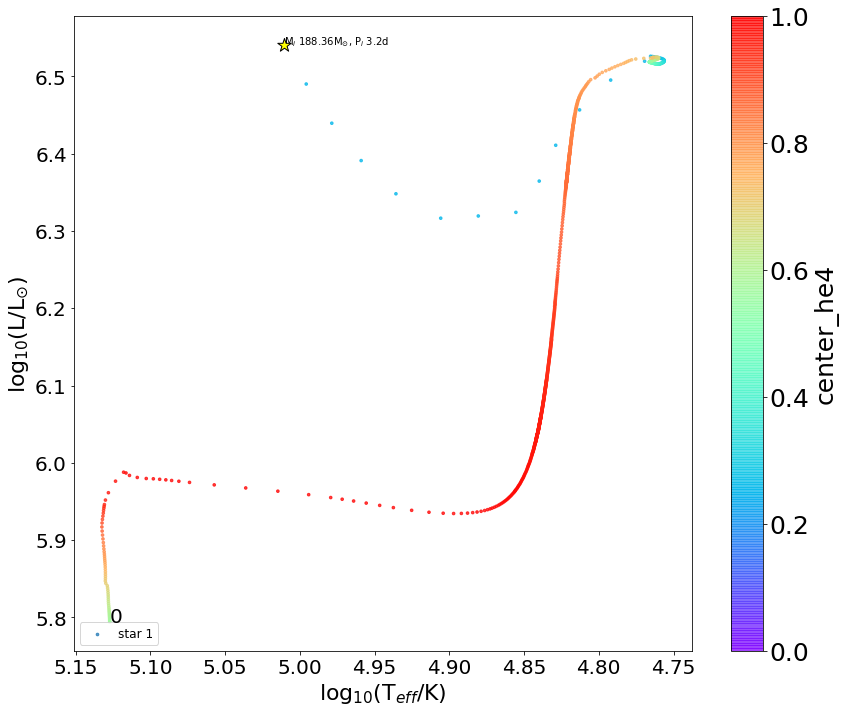

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/315//LOGS1/
0  Mi  188.36 Msun,  Pi 3.4d


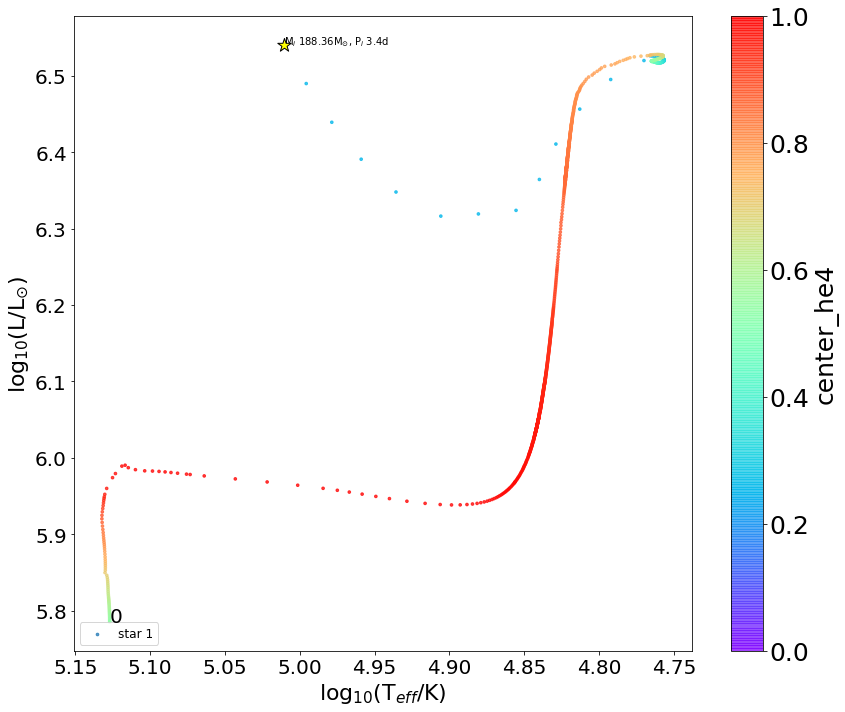

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/338//LOGS1/
0  Mi  188.36 Msun,  Pi 3.6d


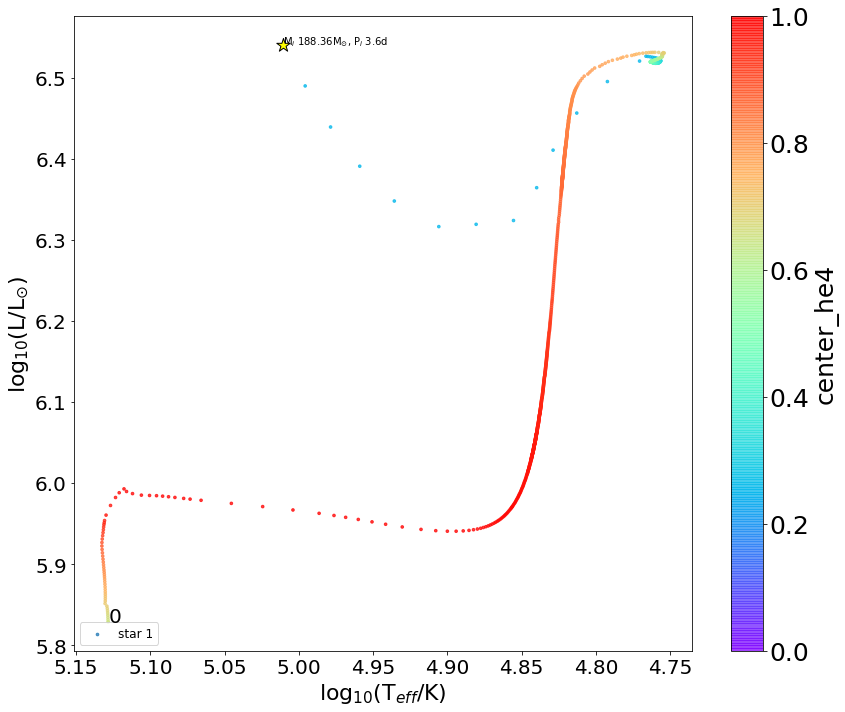

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/361//LOGS1/
0  Mi  188.36 Msun,  Pi 3.8d


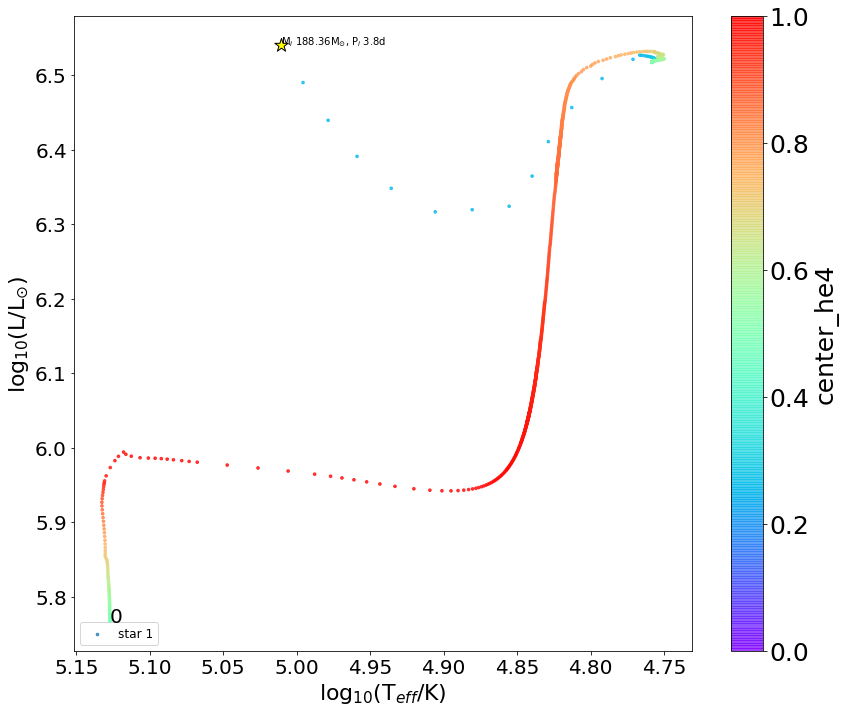

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/384//LOGS1/
0  Mi  188.36 Msun,  Pi 4.0d


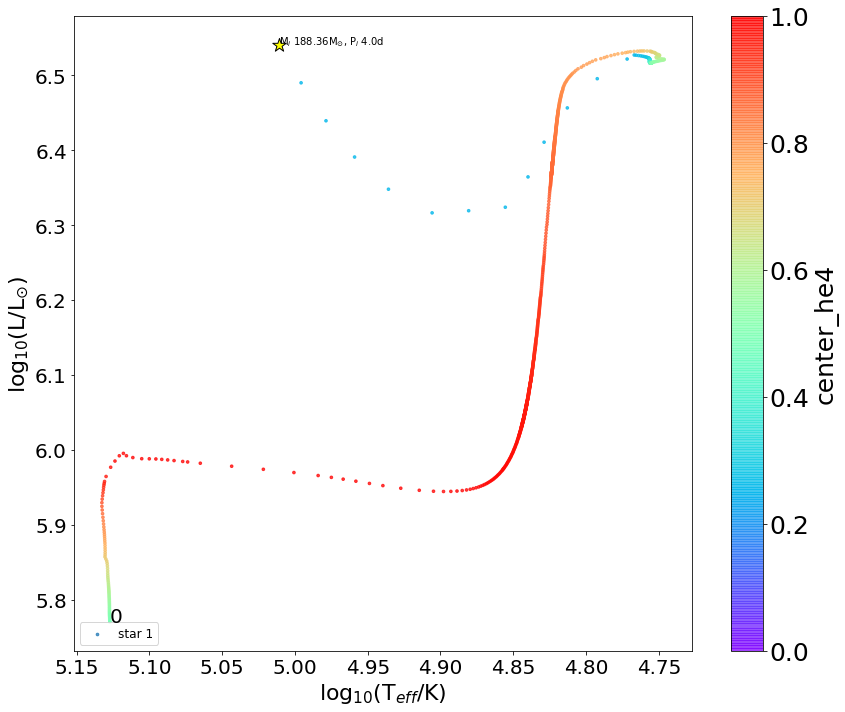

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/407//LOGS1/
0  Mi  188.36 Msun,  Pi 4.2d


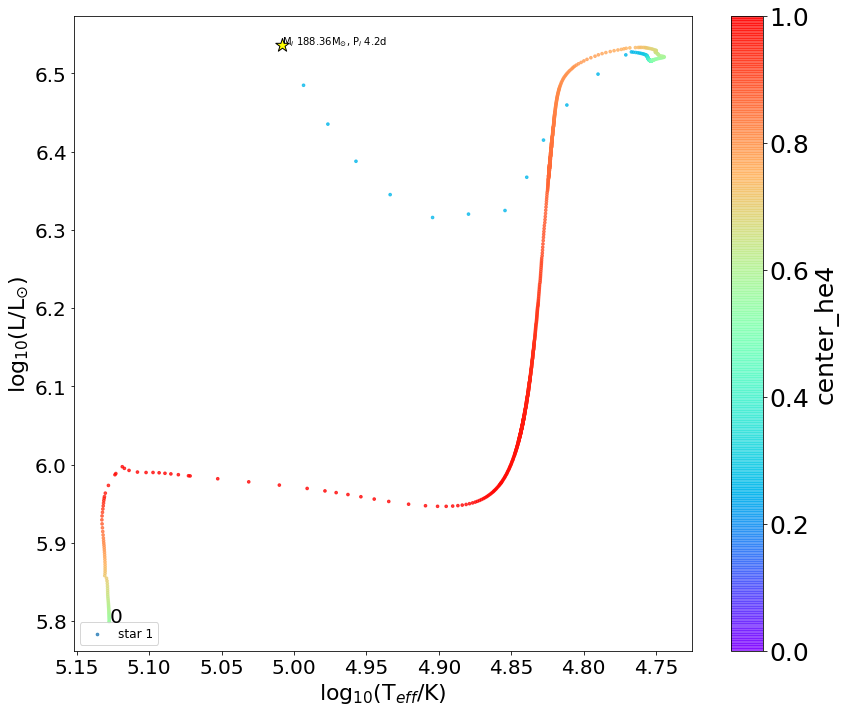

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/430//LOGS1/
0  Mi  188.36 Msun,  Pi 4.4d


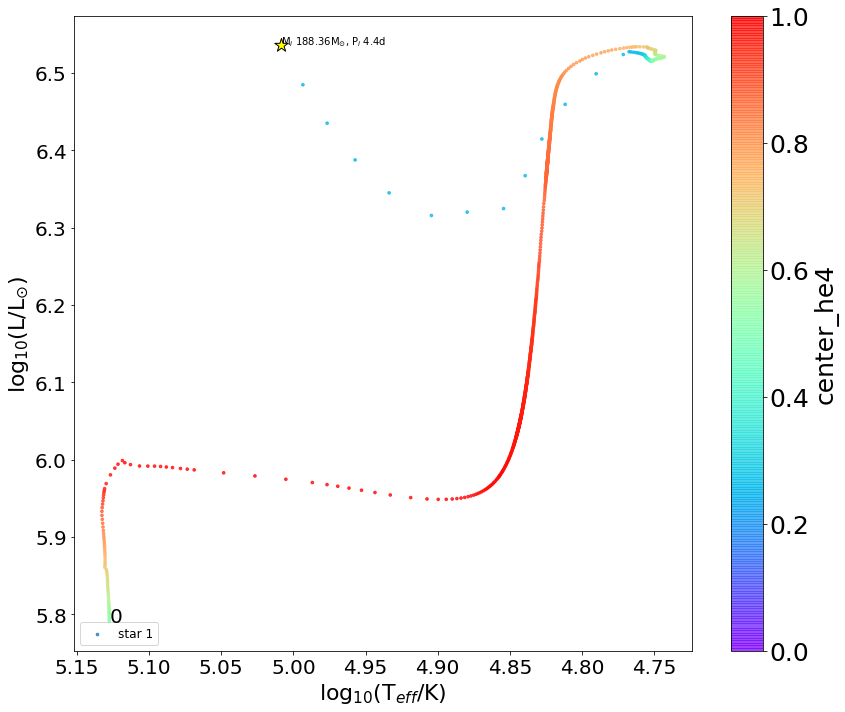

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/453//LOGS1/
0  Mi  188.36 Msun,  Pi 4.6d


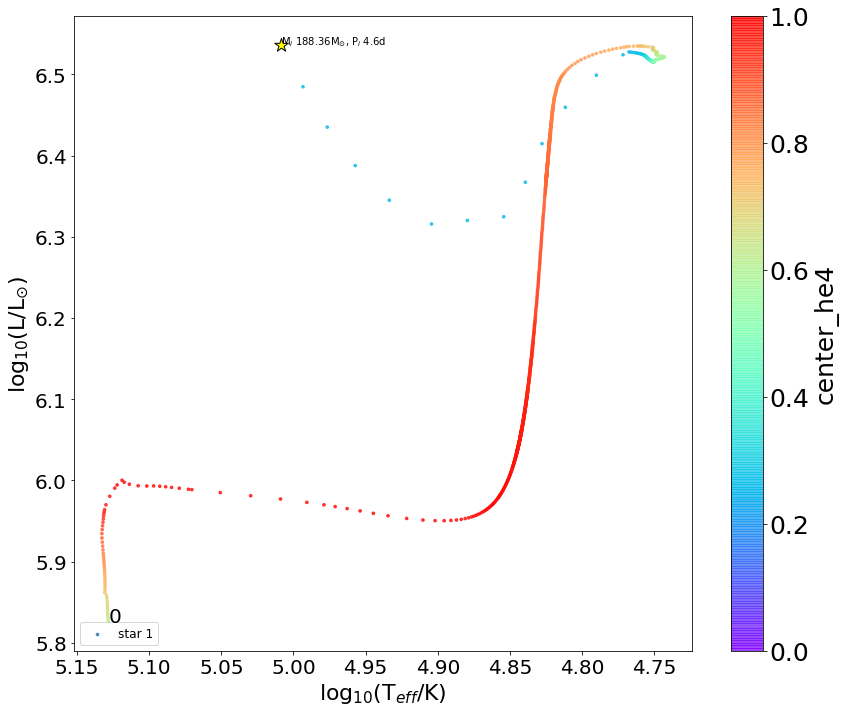

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/476//LOGS1/
0  Mi  188.36 Msun,  Pi 4.8d


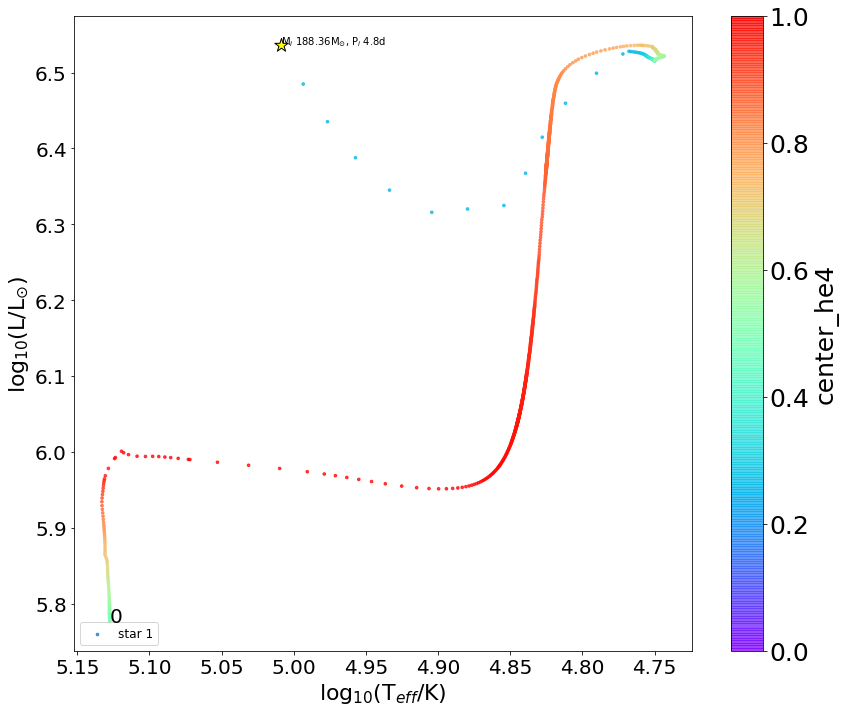

/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/499//LOGS1/
0  Mi  188.36 Msun,  Pi 5.0d


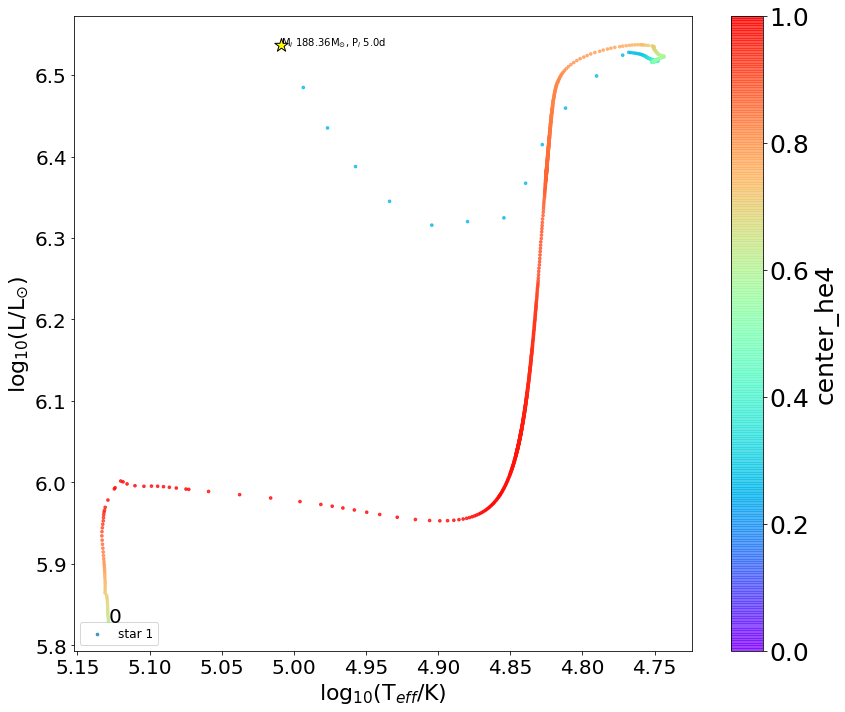

<Table length=1004>
           name             dtype 
-------------------------- -------
              model_number float64
                  star_age float64
                 star_mass float64
                 star_mdot float64
                    log_dt float64
log_total_angular_momentum float64
              he_core_mass float64
                  log_Teff float64
                     log_L float64
                     log_R float64
            surf_avg_v_rot float64
           surf_avg_v_crit float64
    surf_avg_Lrad_div_Ledd float64
     rotational_mdot_boost float64
                 center_h1 float64
                center_he4 float64
                center_c12 float64
                surface_h1 float64
               surface_he4 float64
               surface_c12 float64
               surface_n14 float64
               surface_o16 float64
              surface_ne20 float64
              surface_mg24 float64
                       age float64
               period_days float64


In [5]:
# 100 [5, 28, 51, 74, 97, 120, 143, 166, 189, 212, 235, 258, 281, 304, 327, 350, 373, 396, 419, 442, 465, 488]:
# [1, 24, 47, 70, 93, 116, 139, 162, 185, 208, 231, 254, 277, 300, 323, 346, 369, 392, 415, 438, 461, 484]:

for N in [16, 39, 62, 85, 108, 131, 154, 177, 200, 223, 246, 269, 292, 315, 338, 361, 384, 407, 430, 453, 476, 499]:

    history = HR_diagram(logdir = '/n/holystore01/LABS/conroy_lab/Users/lvanson/MESAoutput/ksharpe_proj/dense_mass_x3winds_grid/'+str(N)+'/',
                         colour_by = 'center_he4',save_loc = './', 
               colors = 'rainbow',numdir=0, Vmin = 0, Vmax = 1)#, x_lim = (3.9,4.5), y_lim = (1.25, 4.25))
    
    
history.info() 

/n/home04/lvanson/KatieSharpeProj/Example_system/2.2_1.00_2.10/LOGS1/


/n/home04/lvanson/.conda/envs/jupyter_3.6/lib/python3.6/site-packages/astropy/table/table.py:3075: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


0  Mi  158.49 Msun,  Pi 2.1d


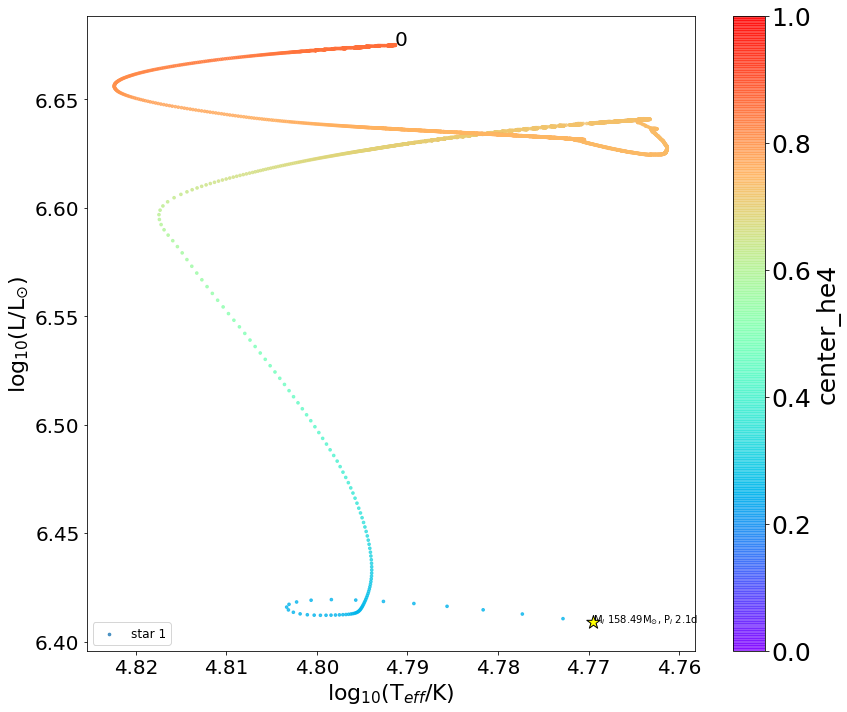

<Table length=4606>
             name              dtype 
----------------------------- -------
                 model_number float64
                     star_age float64
                    star_mass float64
                       log_dt float64
                   log_xmstar float64
                 log_abs_mdot float64
                    num_zones float64
               mass_conv_core float64
                 conv_mx1_top float64
                 conv_mx1_bot float64
                 conv_mx2_top float64
                 conv_mx2_bot float64
                      mx1_top float64
                      mx1_bot float64
                      mx2_top float64
                      mx2_bot float64
                   epsnuc_M_1 float64
                   epsnuc_M_2 float64
                   epsnuc_M_3 float64
                   epsnuc_M_4 float64
                   epsnuc_M_5 float64
                   epsnuc_M_6 float64
                   epsnuc_M_7 float64
                   epsnuc_M_8 

In [53]:
history = HR_diagram(logdir = data_dir, colour_by = 'center_he4',save_loc = './', 
           colors = 'rainbow',numdir=0, Vmin = 0, Vmax = 1)#, x_lim = (3.9,4.5), y_lim = (1.25, 4.25))
    
    
history.info()   
    
    